# 1 - Connecting "IG Comments" & "WA Chat" and Cleaning the Data

In [ ]:
import csv
import nltk
import re
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emojis
import numpy as np

Connecting the Emoji - Catalogue


In [ ]:
catalogue = open("Catalogue - Emojis.csv")
csvreader = csv.reader(catalogue)
header = next(csvreader)
#print(header)
rows = []
for row in csvreader:
    rows.append(row)
#print(rows)

list_name = rows
catalogue = pd.DataFrame (list_name, columns = ['Category', 'ID', 'Code_Original', 'Emoji_Code_2nd_Option', 
                                                'Emoji_Name', 'Emoji_Code_CASI', 'Llave'])
#print(catalogue)

catalogue = catalogue.assign(Result="YES")
catalogue

,Category,ID,Code_Original,Emoji_Code_2nd_Option,Emoji_Name,Emoji_Code_CASI,Llave,Result
0,face-smiling,1,U+1F600,U0001F600,grinning_face,\\\\U0001F600\\,\'\\U0001f600\,YES
1,face-smiling,2,U+1F603,U0001F603,grinning_face_with_big_eyes,\\\\U0001F603\\,\'\\U0001f603\,YES
2,face-smiling,3,U+1F604,U0001F604,grinning_face_with_smiling_eyes,\\\\U0001F604\\,\'\\U0001f604\,YES
3,face-smiling,4,U+1F601,U0001F601,beaming_face_with_smiling_eyes,\\\\U0001F601\\,\'\\U0001f601\,YES
4,face-smiling,5,U+1F606,U0001F606,grinning_squinting_face,\\\\U0001F606\\,\'\\U0001f606\,YES
...,...,...,...,...,...,...,...,...
1848,country-flag,1849,U+1F1FF U+1F1F2,U0001F1FF U0001F1F2,flag:_Zambia,\\\\U0001F1FF \U0001F1F2\\,\'\\U0001f1ff \U0001f1f2\,YES
1849,country-flag,1850,U+1F1FF U+1F1FC,U0001F1FF U0001F1FC,flag:_Zimbabwe,\\\\U0001F1FF \U0001F1FC\\,\'\\U0001f1ff \U0001f1fc\,YES
1850,subdivision-flag,1851,U+1F3F4 U+E0067 U+E0062 U+E0065 U+E006E U+E006...,U0001F3F4 U000E0067 U000E0062 U000E0065 U000E0...,flag:_England,\\\\U0001F3F4 \U000E0067 \U000E0062 \U000E0065...,\'\\U0001f3f4 \U000e0067 \U000e0062 \U000e0065...,YES
1851,subdivision-flag,1852,U+1F3F4 U+E0067 U+E0062 U+E0073 U+E0063 U+E007...,U0001F3F4 U000E0067 U000E0062 U000E0073 U000E0...,flag:_Scotland,\\\\U0001F3F4 \U000E0067 \U000E0062 \U000E0073...,\'\\U0001f3f4 \U000e0067 \U000e0062 \U000e0073...,YES


Connecting WA Chat

In [ ]:
chat = open("chat.txt", "r", encoding="utf-8")
chat = chat.read()
chat = str(chat)
#print(chat)

In [ ]:
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()
text1_tokens = nltk.word_tokenize(chat)
chat_tokens = str(text1_tokens)

In [ ]:
characters = chat_tokens.lower()
characters = re.sub(r' ','',characters)
characters = list(characters)
characters = str(characters)

In [ ]:
s=characters
unicode_token = s.encode("unicode_escape")
unicode_token_str= str(unicode_token)
#unicode_token_str

In [ ]:
catalogue_unicodes = catalogue[['Llave']]
mw_tokenizer = nltk.tokenize.MWETokenizer()
text1_tokens = nltk.word_tokenize(unicode_token_str)
final_tokens = mw_tokenizer.add_mwe(list(catalogue_unicodes))
tokens_casi = mw_tokenizer.tokenize(text1_tokens)
my_list = tokens_casi
df_tokens_final = pd.DataFrame(my_list, columns = ["Llave"])
final_df_WA = pd.merge(catalogue, df_tokens_final, how="inner", on="Llave")
final_df_WA = final_df_WA.assign(Result="WA")
final_df_WA

,Category,ID,Code_Original,Emoji_Code_2nd_Option,Emoji_Name,Emoji_Code_CASI,Llave,Result
0,face-smiling,8,U+1F602,U0001F602,face_with_tears_of_joy,\\\\U0001F602\\,\'\\U0001f602\,WA
1,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
2,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
3,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
4,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
5,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
6,face-hand,30,U+1F917,U0001F917,smiling_face_with_open_hands,\\\\U0001F917\\,\'\\U0001f917\,WA
7,face-sleepy,54,U+1F634,U0001F634,sleeping_face,\\\\U0001F634\\,\'\\U0001f634\,WA
8,face-glasses,71,U+1F913,U0001F913,nerd_face,\\\\U0001F913\\,\'\\U0001f913\,WA
9,face-glasses,71,U+1F913,U0001F913,nerd_face,\\\\U0001F913\\,\'\\U0001f913\,WA


Connecting IG Comments

In [ ]:
file = open ('comments.json', "r", encoding="utf-8")
file = file.read()
comments = json.loads(file)
#comments
comments = str(comments)
#print(comments)

In [ ]:
mw_tokenizer = nltk.tokenize.MWETokenizer()
text2_tokens = nltk.word_tokenize(comments)
comments_tokens = str(text2_tokens)
#comments_tokens

In [ ]:
characters_co = comments_tokens.lower()
characters_co = re.sub(r' ','',characters_co)
characters_co = list(characters_co)
characters_co = str(characters_co)
#characters_co

In [ ]:
co=characters_co
unicode_token_co = co.encode("unicode_escape")
unicode_token_str_co= str(unicode_token_co)
#unicode_token_str_co

In [ ]:
catalogue_unicodes = catalogue[['Llave']]
mw_tokenizer = nltk.tokenize.MWETokenizer()
text2_tokens = nltk.word_tokenize(unicode_token_str_co)
final_tokens_co = mw_tokenizer.add_mwe(list(catalogue_unicodes))
tokens_casi_co = mw_tokenizer.tokenize(text2_tokens)
my_list_co = tokens_casi_co
df_tokens_final_co = pd.DataFrame(my_list_co, columns = ["Llave"])
final_df_CO = pd.merge(catalogue, df_tokens_final_co, how="inner", on="Llave")
final_df_CO = final_df_CO.assign(Result="IG")
#final_df_CO

Connecting Feeling Catalogue

In [ ]:
feelings = open("Catalogue - Feelings.csv")
csvreader = csv.reader(feelings)
header = next(csvreader)
#print(header)
rows = []
for row in csvreader:
    rows.append(row)
#print(rows)

list_name = rows
feelings = pd.DataFrame (list_name, columns = ['Category', 'ID', 'Code_Original', 'Emoji_Code_2nd_Option', 
                                                'Emoji_Name', 'Emoji_Code_CASI', 'Llave','Feeling'])
feelings = feelings[['ID', 'Feeling']]
#feelings

Creating Final Dataframe

In [ ]:
emoji_WA_1 = pd.DataFrame(emojis.get(chat))
emoji_WA_1.columns =['Emoji']

emoji_WC = str(emojis.get(chat))

unicode = emoji_WC.encode('unicode-escape').decode('ASCII')
unicode = unicode.upper()
unicode = unicode.replace("\\","")
unicode = unicode.replace("{","")
unicode = unicode.replace("}","")
unicode = unicode.replace("'","")
unicode = unicode.replace(" ","")
unicode = unicode.split(",")
unicode =pd.DataFrame(unicode)
unicode.columns =['Emoji_Code_2nd_Option']
#unicode

WA_unique = pd.concat([emoji_WA_1.Emoji, unicode.Emoji_Code_2nd_Option],axis=1)
WA_unique = pd.merge(WA_unique, final_df_WA, how="inner", on="Emoji_Code_2nd_Option")
WA_unique = WA_unique[['Emoji', 'Emoji_Code_2nd_Option','Category', 'ID', 'Emoji_Name']]
WA_final = WA_unique.assign(Result="WA")
#WA_final

In [ ]:
emoji_CO_1 = pd.DataFrame(emojis.get(file))
emoji_CO_1.columns =['Emoji']
emoji_IG = str(emojis.get(file))

unicode_CO = emoji_IG.encode('unicode-escape').decode('ASCII')
unicode_CO = unicode_CO.upper()
unicode_CO = unicode_CO.replace("\\","")
unicode_CO = unicode_CO.replace("{","")
unicode_CO = unicode_CO.replace("}","")
unicode_CO = unicode_CO.replace("'","")
unicode_CO = unicode_CO.replace(" ","")
unicode_CO = unicode_CO.split(",")
unicode_CO =pd.DataFrame(unicode_CO)
unicode_CO.columns =['Emoji_Code_2nd_Option']
unicode_CO

IG_unique = pd.concat([emoji_CO_1.Emoji, unicode_CO.Emoji_Code_2nd_Option],axis=1)
IG_unique = pd.merge(IG_unique, final_df_CO, how="inner", on="Emoji_Code_2nd_Option")
IG_unique = IG_unique[['Emoji', 'Emoji_Code_2nd_Option','Category', 'ID', 'Emoji_Name']]
IG_final = IG_unique.assign(Result="IG")
#IG_final

In [ ]:
final_df = pd.concat([WA_final, IG_final], axis=0)
final_data = pd.merge(final_df, feelings, how="left", on="ID")

final_data

,Emoji,Emoji_Code_2nd_Option,Category,ID,Emoji_Name,Result,Feeling
0,🌙,U0001F319,sky & weather,984,crescent_moon,WA,Neutral
1,🌙,U0001F319,sky & weather,984,crescent_moon,WA,Neutral
2,🤛,U0001F91B,hand-fingers-closed,193,left-facing_fist,WA,Positive
3,👏,U0001F44F,hands,195,clapping_hands,WA,Positive
4,👏,U0001F44F,hands,195,clapping_hands,WA,Positive
...,...,...,...,...,...,...,...
212,👌,U0001F44C,hand-fingers-partial,173,OK_hand,IG,Positive
213,📈,U0001F4C8,office,1273,chart_increasing,IG,Neutral
214,😊,U0001F60A,face-smiling,13,smiling_face_with_smiling_eyes,IG,Positive
215,😊,U0001F60A,face-smiling,13,smiling_face_with_smiling_eyes,IG,Positive


# 2 - Creating different charts and analysis

Word Cloud (Both sources WA & IG)

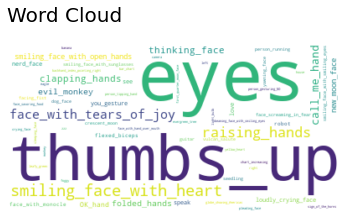

In [ ]:
#Check that we do not have NA
final_data.isna().sum()

#If we have, here we convert that NA to text
#HERE WE CHANGE IT AT THE LAST PART

text = " ".join(final_data.Emoji_Name) 
text
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud", horizontalalignment = 'left', x=0.0, y=1.1, fontsize=20)
plt.show()

Top 5 table emojis and count - Overall

In [ ]:
# Overall

Count_O = pd.DataFrame(final_data.groupby(['Emoji'])['ID'].agg('count'))
Count_O = Count_O.sort_values('ID',ascending=False)
Count_O = Count_O.head(5)
Count_O.rename(columns = {'ID':'Times'},inplace = True)
Count_O = Count_O.transpose()
Count_O

Emoji,👍,😍,🙌,😂,🤙
Times,24,23,18,15,12


Top 5 table emojis and count - WA

In [ ]:
Count_WA = final_data.query("Result=='WA'")
Count_WA = pd.DataFrame(Count_WA.groupby(['Emoji'])['ID'].agg('count'))
Count_WA = Count_WA.sort_values('ID',ascending=False)
Count_WA = Count_WA.head(5)
Count_WA.rename(columns = {'ID':'Times'},inplace = True)
Count_WA = Count_WA.transpose()
Count_WA

Emoji,👍,🙏,🤗,👏,🤓
Times,14,8,6,4,3


Top 5 table emojis and count - IG

In [ ]:
Count_IG = final_data.query("Result=='IG'")
Count_IG = pd.DataFrame(Count_IG.groupby(['Emoji'])['ID'].agg('count'))
Count_IG = Count_IG.sort_values('ID',ascending=False)
Count_IG = Count_IG.head(5)
Count_IG.rename(columns = {'ID':'Times'},inplace = True)
Count_IG = Count_IG.transpose()
Count_IG

Emoji,😍,🙌,😂,🤙,👍
Times,23,16,14,12,10


Pie Chart (Positive/Negative/Neutral) - Overall

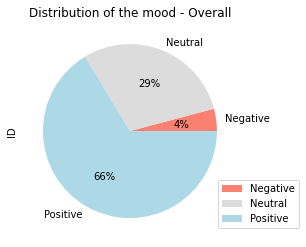

In [ ]:
final_data.groupby(['Feeling']).count().plot(kind='pie', y='ID', autopct='%1.0f%%',
                                            colors = ['salmon', 'gainsboro', 'lightblue'], 
                                            title="Distribution of the mood - Overall")

plt.legend(bbox_to_anchor=(1.3, 0.3))
plt.show()

Pie Chart (Positive/Negative/Neutral) - IG

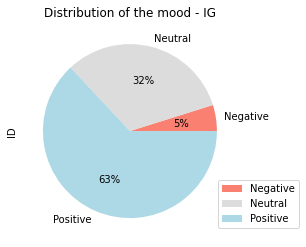

In [ ]:
Mood_IG = final_data.query("Result=='IG'")
Mood_IG.groupby(['Feeling']).count().plot(kind='pie', y='ID', autopct='%1.0f%%',
                                            colors = ['salmon', 'gainsboro', 'lightblue'], 
                                            title="Distribution of the mood - IG")

plt.legend(bbox_to_anchor=(1.3, 0.3))
plt.show()
plt.show()

Pie Chart (Positive/Negative/Neutral) - WA

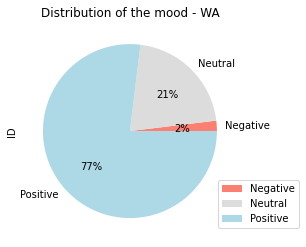

In [ ]:
Mood_WA = final_data.query("Result=='WA'")
Mood_WA.groupby(['Feeling']).count().plot(kind='pie', y='ID', autopct='%1.0f%%',
                                            colors = ['salmon', 'gainsboro', 'lightblue'], 
                                            title="Distribution of the mood - WA")

plt.legend(bbox_to_anchor=(1.3, 0.3))
plt.show()

Ranking Categories

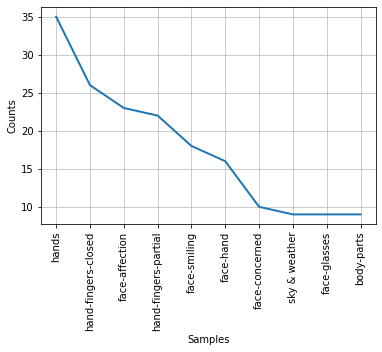

In [ ]:
from nltk import FreqDist
fdist1 = FreqDist(final_data.Category)
fdist1
# Set the plot size
#plt.rcParams["figure.figsize"] = (60, 12)
plt.rcParams.update({'font.size': 10})

# Plot the top n appeared tokens from our retrieved data in normal way
fdist1.plot(10, cumulative=False)
plt.show()

Total emojis used

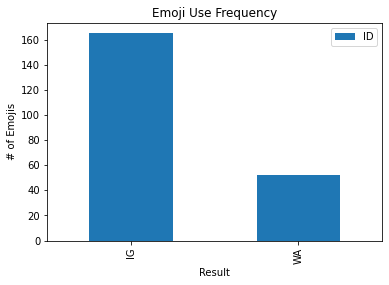

In [ ]:
final_data.groupby(['Result']).count().plot(kind='bar', y='ID',title="Emoji Use Frequency").set_ylabel('# of Emojis')
plt.show()
                                            
                                          

Cover Rate (unique emojis found in the catalogue / total unique emojis in the chat)

In [ ]:
#WA Cover rate

WA_Cover = len(set(final_df_WA.ID.unique()))/ (len(set(emoji_WA_1.Emoji.unique())))
WA_Cover

0.8571428571428571

In [ ]:
#IG Cover rate

IG_Cover = len(set(final_df_CO.ID.unique()))/ (len(set(emoji_CO_1.Emoji.unique())))
IG_Cover

0.9245283018867925